# Simulation 2C

In this simulation we run the football example using the *indirect method* with the first set of data matrices ($P_1, P_2$).

We consider the two following direct methods:
- Agrregation by weighting average (WA) and exploitation by rank centrality (RC)
- Agrregation by weighting average (WA) and exploitation by netflow (NF)

### Importing Libraries

Importing standard libraries and the following modules:
- *datagenerator.py*: containing data sources;
- *normalizationlib.py*: containing functions to perform normalizations;
- *aggregationlib.py*: containing functions to perform aggregation;
- *exploitationlib.py*: containing functions to perform exploitation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datagenerator as data
import normalizationlib as norm
import aggregationlib as agg
import exploitationlib as expl

# Football Example

We consider four team (Tunisia, Malta, Brazil, Argentina). The two experts agree that 
- Tunisia and Malta are weak teams;
- Brazil and Argentina are strong teams;
- Brazil beats Tunisia and Malta moderately;
- Argentina beats Tunisia and Malta largely;
- Brazil beats Argentina narrowly.

### Loading the data

In [2]:
P,labels = data.get_PREF_tensor_football1()
n_choices = P.shape[0]
n_experts = P.shape[2]
labels = np.array(labels)

### Normalizing data using centrality matrix

In [3]:
S = norm.centrality_tensor(P)

### Indirect Approach: WA + RC (same as OWA + RC)

In [4]:
C1 = agg.WA_3D(S)
r1 = expl.RCT_2D(C1)

### Indirect Approach: WA + NF (same as OWA + NF)

In [5]:
C3 = C1
r3 = expl.NFT_2D(C3)

### Printing the final consesus ranking

WA+RC ranking: ['Argentina' 'Brazil' 'Tunisia' 'Malta']
WA+NF ranking: ['Argentina' 'Brazil' 'Tunisia' 'Malta']


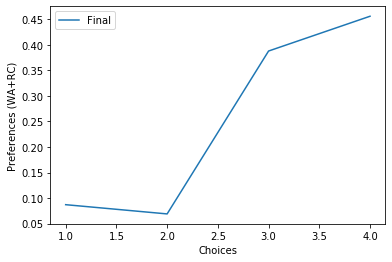

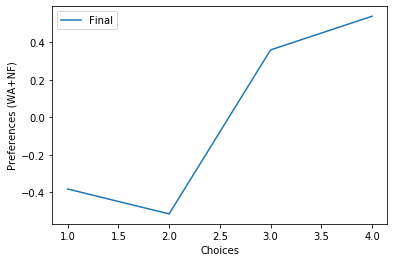

In [6]:
print('WA+RC ranking: {0}'.format(labels[np.argsort(r1)[::-1]]))

plt.plot(np.arange(n_choices)+1,r1,label='Final')
plt.xlabel('Choices')
plt.ylabel('Preferences (WA+RC)')
plt.legend()

print('WA+NF ranking: {0}'.format(labels[np.argsort(r3)[::-1]]))

plt.figure()
plt.plot(np.arange(n_choices)+1,r3,label='Final')
plt.xlabel('Choices')
plt.ylabel('Preferences (WA+NF)')
plt.legend()